In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Conducting necessary imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


##Loading data from csv files into pandas data frames and converting into numpy arrays

In [31]:
path = '/content/drive/MyDrive/IDS/data_CHEMBL204.csv'
#getting list of columns
cols = list(pd.read_csv(path, nrows =1))
read_file = pd.read_csv(r"/content/drive/MyDrive/IDS/data_CHEMBL204.csv")
#storing arrays of labels and features separately using column headers
#X = pd.read_csv(path, usecols =[i for i in cols if (i != 'molecule_id' and i != 'pXC50')])
#Y = pd.read_csv(path, usecols = ['pXC50'])
X = read_file.drop(['pXC50','molecule_id'],axis=1)
Y = read_file['pXC50']
print(X)
print(Y)
#converting into numpy arrays
x = np.asarray(X)
y = np.asarray(Y)
print(x)

      b0001  b0002  b0003  b0004  b0005  ...  b1020  b1021  b1022  b1023  b1024
0         1      1      1      0      1  ...      0      1      0      0      0
1         1      1      1      1      1  ...      0      1      0      0      0
2         1      1      1      1      1  ...      0      0      0      0      0
3         1      1      1      0      1  ...      0      0      0      0      0
4         1      1      1      1      1  ...      0      0      0      0      0
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
5737      1      0      1      0      1  ...      0      0      0      0      0
5738      1      0      1      0      1  ...      0      0      0      0      0
5739      1      1      1      1      1  ...      0      1      0      0      1
5740      1      0      1      1      1  ...      0      0      0      0      1
5741      1      0      1      1      1  ...      0      0      0      0      0

[5742 rows x 1024 columns]
0       5.00

##Performing Test-Train Split

In [32]:
#performing train and test split with a 0.75:0.25 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

##Implementing Regular (Non-PCA) Linear Regression

In [33]:
#creating linear regression object via sklearn
linearRegressor = LinearRegression()
#fitting the linear regression model to our data
linearRegressor.fit(X_train, y_train)
print('Accuracy Score: ', linearRegressor.score(X_train, y_train))
#predicting test data on our linear regressor
y_pred = linearRegressor.predict(X_test)
print('Accuracy Score: ', linearRegressor.score(X_test, y_test))

Accuracy Score:  0.7887319112235311
Accuracy Score:  -3.5036626928028623e+19


In [34]:
#generating metrics for our model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"The R_square of prediction of (RF): {metrics.r2_score(y_test, y_pred)}")

Mean Absolute Error: 517359547.76322085
Mean Squared Error: 8.679927641614264e+19
Root Mean Squared Error: 9316612926.173473
The R_square of prediction of (RF): -3.5036626928028623e+19


##Applying PCA on Training Data

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train_new = X_train

# Apply PCA on the data

# initialize for 2D PCA
pca = PCA(n_components = 10)
pca.fit(X_train_new)

# transform
pca_X = pca.transform(X_train_new)
pca_X.shape

(4019, 10)

##Applying PCA on Testing Data

In [36]:
X_test_new = X_test

# Apply PCA on the testing data

# initialize for 10D PCA
pca = PCA(n_components = 10)
pca.fit(X_test_new)

# transform
pca_X_test = pca.transform(X_test_new)
pca_X_test.shape

(1723, 10)

##Linear Regression on PCA Data

In [37]:
#creating linear regression object via sklearn
linearRegressor = LinearRegression()
#fitting the linear regression model to our data
linearRegressor.fit(pca_X, y_train)
print('Accuracy Score: ', linearRegressor.score(pca_X, y_train))
#predicting test data on our linear regressor
y_pred_pca = linearRegressor.predict(pca_X_test)
print('Accuracy Score: ', linearRegressor.score(pca_X_test, y_test))

Accuracy Score:  0.23007336654208754
Accuracy Score:  0.18572103838723664


In [38]:
#obtaining comparison metrics for this model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_pca))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_pca))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))
print(f"The R_square of prediction of (RF): {metrics.r2_score(y_test, y_pred_pca)}")

Mean Absolute Error: 1.1200032634558366
Mean Squared Error: 2.017283935866959
Root Mean Squared Error: 1.4203112109206768
The R_square of prediction of (RF): 0.18572103838723664


## Visualizing Metrics between PCA and Non-PCA Models

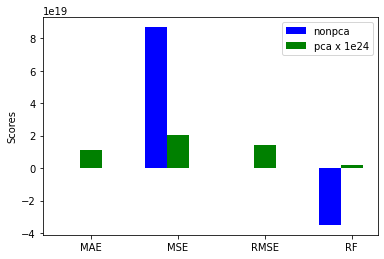

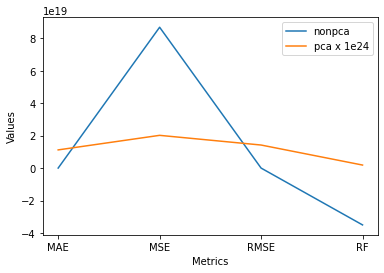

In [40]:
import matplotlib.pyplot as plt

#Bar graph axis initialization
#creating plot x-axis
x_axis = ['MAE', 'MSE', 'RMSE', 'RF']

#creating y points for both pca and non-pca models
nonpca_labels = [metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test, y_pred)]
#normalizing pca metrics because of their extremely small values
pca_labels = [metrics.mean_absolute_error(y_test, y_pred_pca)*1e19, metrics.mean_squared_error(y_test, y_pred_pca)*1e19, np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca))*1e19, metrics.r2_score(y_test, y_pred_pca)*1e19]

#creating the plot
N = 4
ind = np.arange(N)  
width = 0.25 

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, nonpca_labels, width, color='b')
rects2 = ax.bar(ind+width, pca_labels, width, color='g')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('MAE', 'MSE', 'RMSE', 'RF') )
ax.legend( (rects1[0], rects2[0]), ('nonpca', 'pca x 1e24') )
plt.show()


#creating line chart for metrics
plt.plot(x_axis,nonpca_labels, label = "nonpca")
plt.plot(x_axis,pca_labels, label = "pca x 1e24")
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.legend()
plt.show()


##Installing sklearn's GA Library

In [16]:
pip install sklearn-genetic

     |████████████████████████████████| 163kB 26.1MB/s 


##Applying GA to Linear Regression Model

In [45]:
import numpy as np
from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV

# initialize the estimator
estimator = LinearRegression()

# initialize the selector
selector = GeneticSelectionCV(estimator,
                              cv=5,
                              verbose=1,
                              max_features=5,
                              n_population=50,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=40,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              n_gen_no_change=10,
                              caching=True,
                              n_jobs=-1)


X_train_ga = selector.fit_transform(X_train, y_train)
X_test_ga = selector.fit_transform(X_test, y_test)


Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                  	max                    
0  	50    	[0.01299459 2.86      ]	[0.02698802 1.41435498]	[-0.003984  1.      ]	[0.10390754 5.        ]
1  	30    	[-2799.97936645    15.98      ]	[4490.00173151   22.69228063]	[-1.e+04  1.e+00]    	[ 0.10390754 65.        ]
2  	25    	[-1999.96753718     7.38      ]	[4000.01623155   12.64735545]	[-10000.      0.]    	[ 0.11980133 60.        ]
3  	25    	[-2399.94627721    13.62      ]	[4270.86149056   20.86805214]	[-1.e+04  1.e+00]    	[ 0.13067365 68.        ]
4  	37    	[-2799.93409708    13.7       ]	[4490.02996196   20.18737229]	[-10000.      0.]    	[ 0.15969367 55.        ]
5  	27    	[-2599.91079242    16.2       ]	[4386.39531767   23.5915239 ]	[-1.e+04  2.e+00]    	[ 0.16143415 93.        ]
6  	28    	[-1799.88457696    12.5       ]	[3841.92862065   19.65731416]	[-1.e+04  2.e+00]    	[ 0.17988483 63.        ]
7  	31    	[-2399.883

##Linear Regression with GA

In [46]:
X_train_ga.shape
X_test_ga.shape

(1723, 5)

In [47]:
#creating linear regression object via sklearn
linearRegressor = LinearRegression()
#fitting the GA data to linear regression model
linearRegressor.fit(X_train_ga, y_train)
print('Training Accuracy Score: ', linearRegressor.score(X_train_ga, y_train))
#predicting test data on our linear regressor
y_pred_ga = linearRegressor.predict(X_test_ga)
print('Testing Accuracy Score: ', linearRegressor.score(X_test_ga, y_test))


Training Accuracy Score:  0.2423712004186258
Testing Accuracy Score:  -0.4282815767974908


In [48]:
#obtaining comparison metrics for this model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ga))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ga))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ga)))
print(f"The R_square of prediction of (RF): {metrics.r2_score(y_test, y_pred_ga)}")

Mean Absolute Error: 1.4771782677212422
Mean Squared Error: 3.53840589846715
Root Mean Squared Error: 1.8810650968180633
The R_square of prediction of (RF): -0.4282815767974908


##Visualizing Normal vs PCA vs GA Metrics

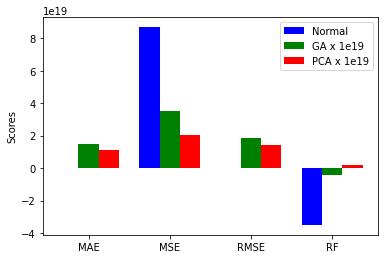

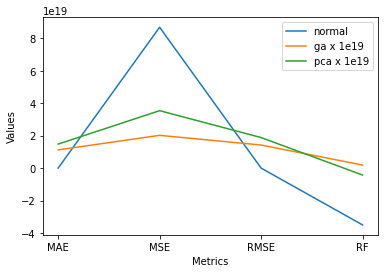

In [57]:
#Bar graph axis initialization
#creating plot x-axis
x_axis = ['MAE', 'MSE', 'RMSE', 'RF']

#creating y points normal predictions
nonga_labels = [metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test, y_pred)]
#normalizing ga metrics because of their extremely small values
ga_labels = [metrics.mean_absolute_error(y_test, y_pred_ga)*1e19, metrics.mean_squared_error(y_test, y_pred_ga)*1e19, np.sqrt(metrics.mean_squared_error(y_test, y_pred_ga))*1e19, metrics.r2_score(y_test, y_pred_ga)*1e19]
#normalizing pca metrics because of their extremely small values
pca_labels = [metrics.mean_absolute_error(y_test, y_pred_pca)*1e19, metrics.mean_squared_error(y_test, y_pred_pca)*1e19, np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca))*1e19, metrics.r2_score(y_test, y_pred_pca)*1e19]

#creating the plot
N = 4
ind = np.arange(N)  
width = 0.25 

fig = plt.figure()
ax = fig.add_subplot(111)

ind1 = np.arange(len(nonga_labels))
ind2 = [x+0.25 for x in ind1]
ind3 = [x+0.25 for x in ind2]

rects1 = ax.bar(ind1, nonga_labels, width, color='b')
rects2 = ax.bar(ind2, ga_labels, width, color='g')
rects3 = ax.bar(ind3, pca_labels, width, color = 'r')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('MAE', 'MSE', 'RMSE', 'RF') )
ax.legend( (rects1[0], rects2[0] ,rects3[0]), ('Normal', 'GA x 1e19', 'PCA x 1e19') )
plt.show()


#creating line chart for metrics
plt.plot(x_axis,nonpca_labels, label = "normal")
plt.plot(x_axis,pca_labels, label = "ga x 1e19")
plt.plot(x_axis, ga_labels, label = "pca x 1e19")
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.legend()
plt.show()